<a href="https://colab.research.google.com/github/Visionaryofthefuture/Machine-Learning/blob/main/Data_11th_june_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
list = []
import os
for i in os.listdir("/content/"):
  if i in ["accounts.csv", "sales_pipeline.csv", "data_dictionary.csv", "products.csv", "sales_teams.csv"]:
    df = pd.read_csv("/content/"+i)
    print(f" {i} : {df.shape}")
    list.append(df)



 sales_teams.csv : (35, 3)
 products.csv : (7, 3)
 data_dictionary.csv : (21, 3)
 accounts.csv : (85, 7)
 sales_pipeline.csv : (8800, 8)


In [26]:
account = list[3]
account.loc[account['sector'] == 'technolgy', 'sector'] = 'technology'
account['subsidiary_of'].fillna("Independent", inplace=True)
account

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technology,1996,1100.04,2822,United States,Independent
1,Betasoloin,medical,1999,251.41,495,United States,Independent
2,Betatech,medical,1986,647.18,1185,Kenya,Independent
3,Bioholding,medical,2012,587.34,1356,Philipines,Independent
4,Bioplex,medical,1991,326.82,1016,United States,Independent
...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,Independent
81,Zencorporation,technology,2011,40.79,142,China,Independent
82,Zoomit,entertainment,1992,324.19,978,United States,Independent
83,Zotware,software,1979,4478.47,13809,United States,Independent


In [27]:
sales_pipeline = list[4].drop(columns = ["opportunity_id"])
sales_team = list[0]
sales_team

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central
5,Jonathan Berthelot,Melvin Marxen,Central
6,Marty Freudenburg,Melvin Marxen,Central
7,Gladys Colclough,Melvin Marxen,Central
8,Niesha Huffines,Melvin Marxen,Central
9,Darcel Schlecht,Melvin Marxen,Central


In [28]:
#sales_pipeline.drop(columns = ["opportunity_id"], inplace =True)
sales_pipeline[(sales_pipeline['sales_agent'] == "Darcel Schlecht") & (sales_pipeline['deal_stage'] == "Won")]


,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
1,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
23,Darcel Schlecht,GTX Basic,Warephase,Won,2016-11-08,2017-03-26,561.0
41,Darcel Schlecht,GTX Plus Basic,Konmatfix,Won,2016-11-14,2017-03-20,1170.0
45,Darcel Schlecht,MG Advanced,Conecom,Won,2016-11-16,2017-03-14,3725.0
...,...,...,...,...,...,...,...
8129,Darcel Schlecht,GTXPro,Codehow,Won,2017-11-24,2017-12-04,5110.0
8139,Darcel Schlecht,GTX Basic,Warephase,Won,2017-11-25,2017-12-11,537.0
8155,Darcel Schlecht,GTXPro,Genco Pura Olive Oil Company,Won,2017-11-27,2017-11-30,4888.0
8231,Darcel Schlecht,GTXPro,Inity,Won,2017-12-10,2017-12-17,4755.0



Sales Agent performance by revenue earned

Here a higher revenue could mean the person sold the more expensive products


30


<Axes: xlabel='sales_agent'>

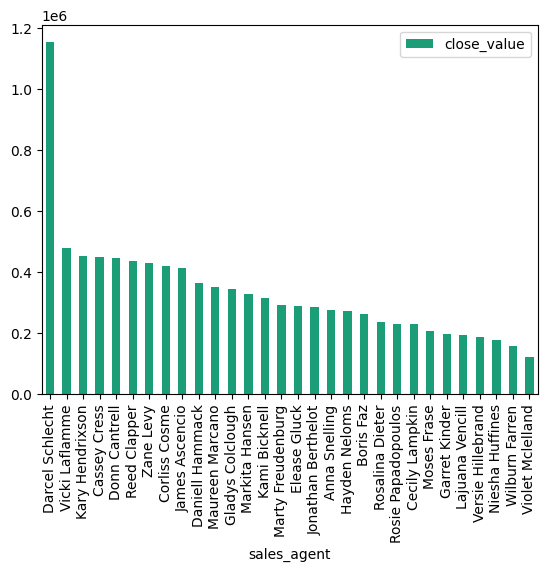

In [29]:
print(sales_pipeline["sales_agent"].nunique())

sales_agent = sales_pipeline.groupby('sales_agent')['close_value'].sum().reset_index()
sales_agent = sales_agent.sort_values(by = "close_value", ascending = False)
sales_agent.set_index('sales_agent', inplace = True)
sales_agent.plot(kind = "bar", color = sns.palettes.mpl_palette('Dark2'))


Total Orders placed per company

In [30]:
result = sales_pipeline.groupby('account')['close_value'].count().reset_index()
result = result.sort_values(ascending = False, by = "close_value")
result

,account,close_value
34,Hottechi,193
40,Kan-code,187
42,Konex,171
11,Condax,159
17,Dontechi,117
...,...,...
4,Bioplex,46
53,Plusstrip,46
69,The New York Inquirer,44
67,Sumace,41


<Axes: xlabel='account'>

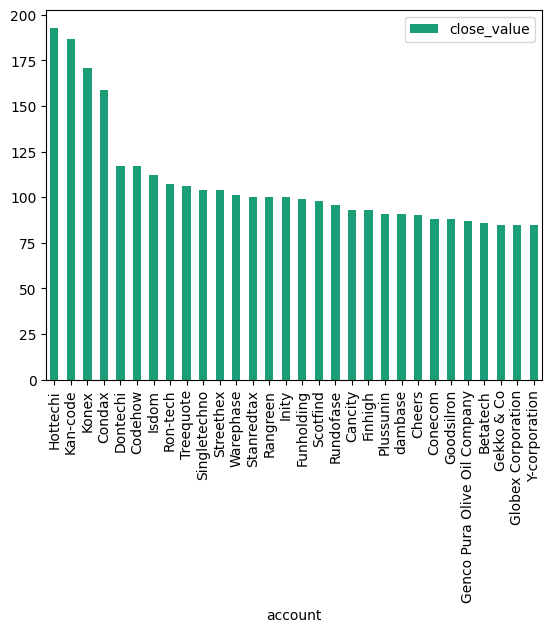

In [31]:
#@title Visualising top Company order
to_plot = result[0:30]
to_plot.set_index('account', inplace=True)
to_plot.plot(kind = "bar", color = sns.palettes.mpl_palette('Dark2'))

Top 2 products sold per year by amount


In [32]:
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == "Won"]
top2_byamount = won_deals.groupby("product")["close_value"].sum().sort_values(ascending=False)
top2_byamount = top2_byamount.reset_index()
top2_byamount = top2_byamount.head(2)
top2_byamount

,product,close_value
0,GTXPro,3510578.0
1,GTX Plus Pro,2629651.0


To find the top 2 sold by quantity

In [33]:
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == "Won"]
top2_byquantity = won_deals.groupby("product").size().sort_values(ascending=False).head(2)
top2_byquantity = top2_byquantity.reset_index(name='Quantity')
top2_byquantity

,product,Quantity
0,GTX Basic,915
1,MG Special,793


To recommend the best sales agent by bias


In [34]:
columns = ['sales_agent', 'Number of products sold']
sales_agent_by_revenue = sales_pipeline.groupby('sales_agent')['close_value'].sum().reset_index().sort_values(ascending = False, by = "close_value")
sales_agent_by_number = sales_pipeline.groupby('sales_agent')['close_value'].count().reset_index()
sales_agent_by_number.columns = columns
sales_agent_by_number = sales_agent_by_number.sort_values(ascending = False, by = "Number of products sold")

<Axes: title={'center': 'Sales_Agent vs Revenue'}, xlabel='Sales Agent Name', ylabel='Revenue in millions'>

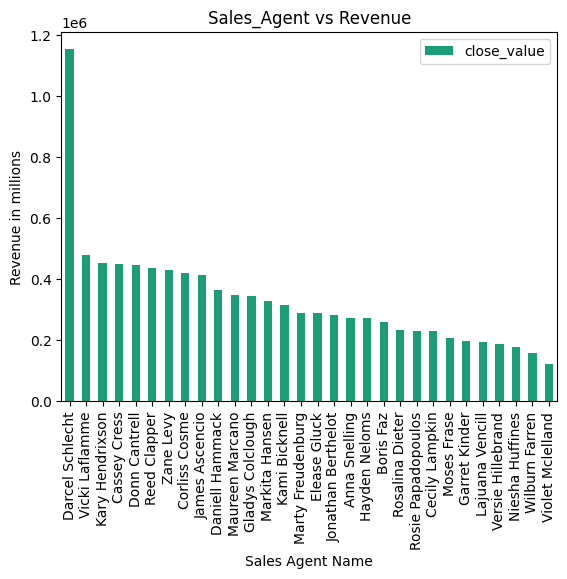

In [35]:
sales_agent_by_revenue.set_index('sales_agent', inplace = True)

sales_agent_by_revenue.plot(kind= "bar", color = sns.palettes.mpl_palette('Dark2'), title = "Sales_Agent vs Revenue", xlabel = "Sales Agent Name", ylabel = "Revenue in millions")

<Axes: xlabel='sales_agent'>

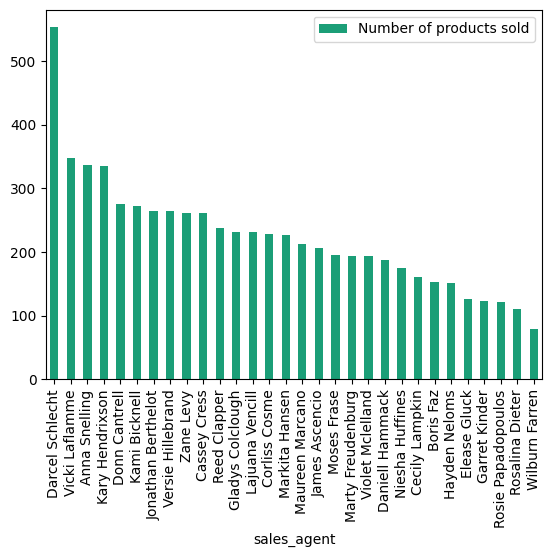

In [36]:
sales_agent_by_number.set_index('sales_agent', inplace = True)
sales_agent_by_number.plot(kind= "bar", color = sns.palettes.mpl_palette('Dark2'))

In [37]:
product_counts = pd.pivot_table(sales_pipeline, index='sales_agent', columns='product', values='close_value', aggfunc='count', fill_value=0)

In [38]:
sales_agent_merged = pd.merge(sales_agent_by_revenue, sales_agent_by_number, how = "outer", on = "sales_agent")
sales_agent_merged["average_cost_sold"] = sales_agent_merged["close_value"]/sales_agent_merged["Number of products sold"]
sales_agent_merged = sales_agent_merged.sort_values(ascending = False, by = "close_value")
sales_agent_merged.reset_index()
sales_agent_merged2 = pd.merge(sales_agent_merged, product_counts, how = "outer", on = "sales_agent")
sales_agent_merged2

,close_value,Number of products sold,average_cost_sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special
sales_agent,,,,,,,,,,
Darcel Schlecht,1153214.0,553,2085.377939,1,53,83,47,265,61,43
Vicki Laflamme,478396.0,347,1378.662824,0,83,19,27,59,79,80
Kary Hendrixson,454298.0,335,1356.113433,0,129,51,31,77,18,29
Cassey Cress,450489.0,261,1726.011494,0,58,43,32,53,60,15
Donn Cantrell,445860.0,275,1621.309091,0,74,41,30,73,48,9
Reed Clapper,438336.0,237,1849.518987,0,37,42,32,63,44,19
Zane Levy,430068.0,261,1647.770115,0,79,43,32,69,18,20
Corliss Cosme,421036.0,229,1838.585153,1,54,44,38,55,21,16
James Ascencio,413533.0,206,2007.441748,0,54,23,64,33,16,16


Now to analyze remaining parameters like lost and prospecting
:

In [39]:
lost_deals = sales_pipeline[sales_pipeline['deal_stage'].isin(["Lost" ])]
lost_deals_count = lost_deals.groupby("sales_agent").size().sort_values(ascending=False).reset_index(name='Lost Deals')
sales_agent_merged2 = pd.merge(sales_agent_merged2, lost_deals_count, how="outer", on="sales_agent")

sales_agent_merged2["lost_deals_percentage"] = (sales_agent_merged2["Lost Deals"] )/ (sales_agent_merged2["Number of products sold"]+sales_agent_merged2["Lost Deals"]) * 100
sales_agent_merged2.sort_values(ascending=False, by="close_value")


,sales_agent,close_value,Number of products sold,average_cost_sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,lost_deals_percentage
0,Darcel Schlecht,1153214.0,553,2085.377939,1,53,83,47,265,61,43,204,26.948481
1,Vicki Laflamme,478396.0,347,1378.662824,0,83,19,27,59,79,80,126,26.638478
2,Kary Hendrixson,454298.0,335,1356.113433,0,129,51,31,77,18,29,126,27.331887
3,Cassey Cress,450489.0,261,1726.011494,0,58,43,32,53,60,15,98,27.298050
4,Donn Cantrell,445860.0,275,1621.309091,0,74,41,30,73,48,9,117,29.846939
5,Reed Clapper,438336.0,237,1849.518987,0,37,42,32,63,44,19,82,25.705329
6,Zane Levy,430068.0,261,1647.770115,0,79,43,32,69,18,20,100,27.700831
7,Corliss Cosme,421036.0,229,1838.585153,1,54,44,38,55,21,16,79,25.649351
8,James Ascencio,413533.0,206,2007.441748,0,54,23,64,33,16,16,71,25.631769
9,Daniell Hammack,364229.0,187,1947.748663,0,18,53,27,57,22,10,73,28.076923


Considering Darcel Schlecht sold the most units, has the best closing value with a reasonable lost/total deals ratio, has sold products on average with cost above 2000$ ,

he is the best candidate for the best sales agent.

To find the best product that can be sold in next few years


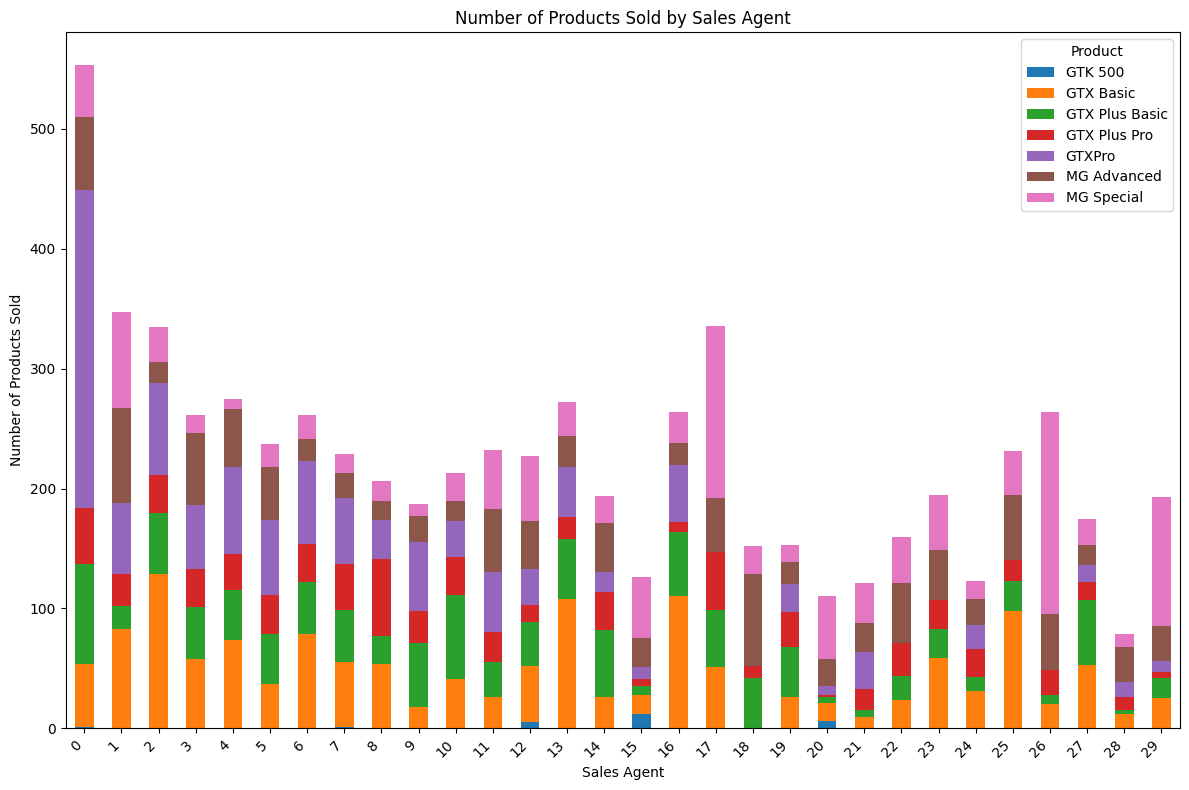

In [40]:
#@title As we can see here, GTK 500 is the least sold item

product_counts = sales_agent_merged2[['GTK 500', 'GTX Basic', 'GTX Plus Basic', 'GTX Plus Pro', 'GTXPro', 'MG Advanced', 'MG Special']]

product_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Products Sold by Sales Agent')
plt.xlabel('Sales Agent')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

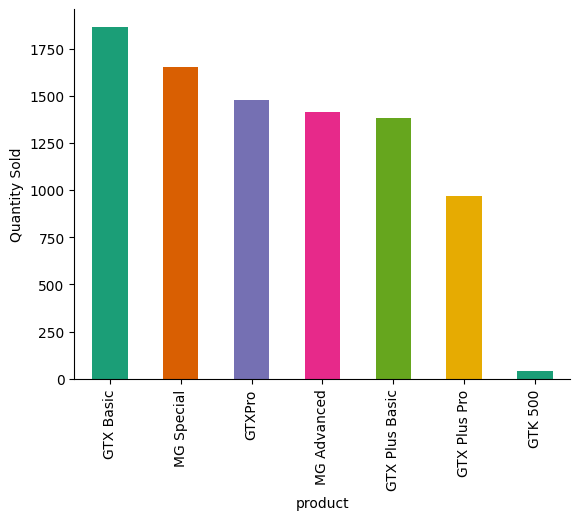

In [41]:
# @title product chart

from matplotlib import pyplot as plt
import seaborn as sns
plt.ylabel("Quantity Sold")
sales_pipeline.groupby('product').size().sort_values(ascending = False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
sales_agent_merged2[(sales_agent_merged2["sales_agent"] == "Darcel Schlecht")]["GTXPro"]/sales_agent_merged2["GTXPro"].sum()*100

0    23.103749
Name: GTXPro, dtype: float64